In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [281]:
df=pd.read_csv("/content/Fish[1].csv")

In [282]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [283]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [284]:
df.shape

(159, 7)

In [285]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [287]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [288]:
df.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [289]:
df.duplicated().sum()

np.int64(0)

<Axes: >

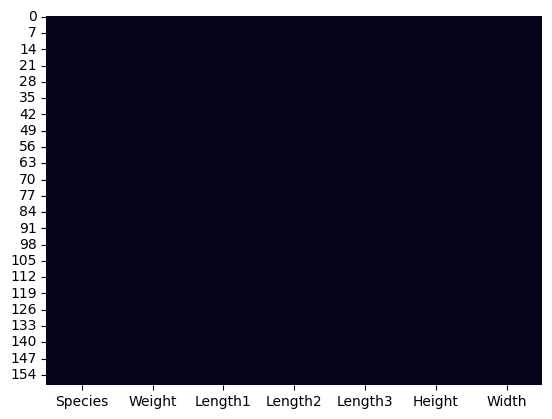

In [290]:
# plot missing values
sns.heatmap(df.isnull(), cbar=False)

## Species

In [291]:
df["Species"].value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


<Axes: xlabel='count', ylabel='Species'>

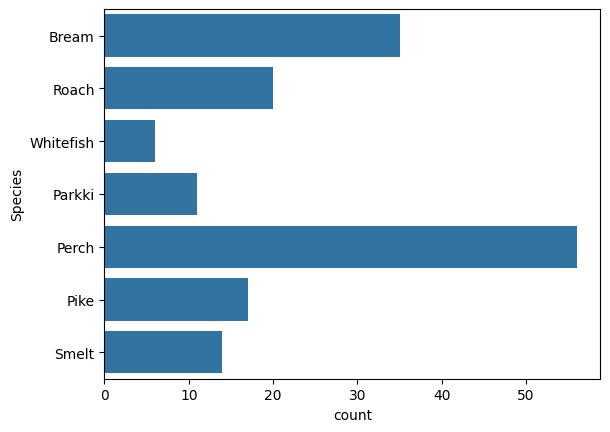

In [292]:
sns.countplot(df['Species'])

### species vs weight

In [293]:
df.groupby('Species')['Weight'].mean().sort_values(ascending=False)

,Weight
Species,
Pike,718.705882
Bream,617.828571
Whitefish,531.000000
Perch,382.239286
Parkki,154.818182
Roach,152.050000
Smelt,11.178571


<Axes: xlabel='Species'>

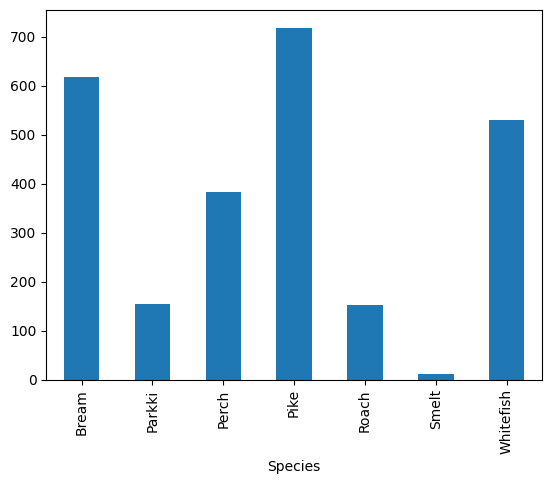

In [294]:
df.groupby('Species')['Weight'].mean().plot(kind='bar')

<Axes: xlabel='Weight', ylabel='Count'>

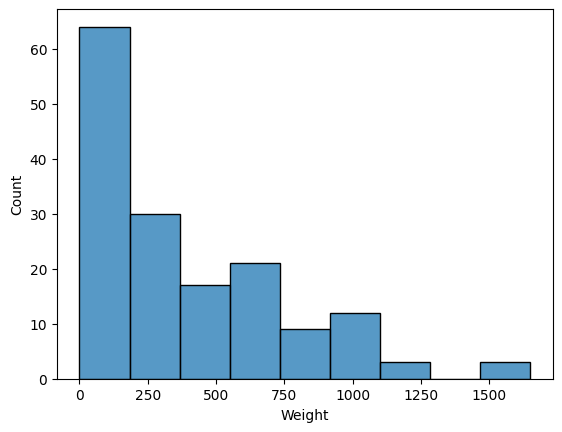

In [295]:
sns.histplot(df["Weight"])

<Axes: xlabel='Length1', ylabel='Count'>

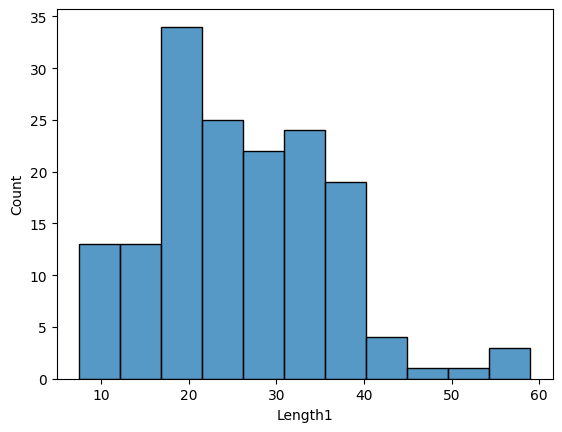

In [296]:
sns.histplot(df["Length1"])

<Axes: xlabel='Length2', ylabel='Count'>

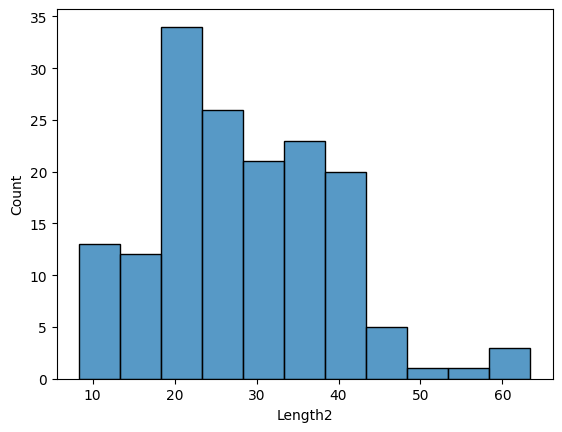

In [297]:
sns.histplot(df["Length2"])

<Axes: xlabel='Height', ylabel='Count'>

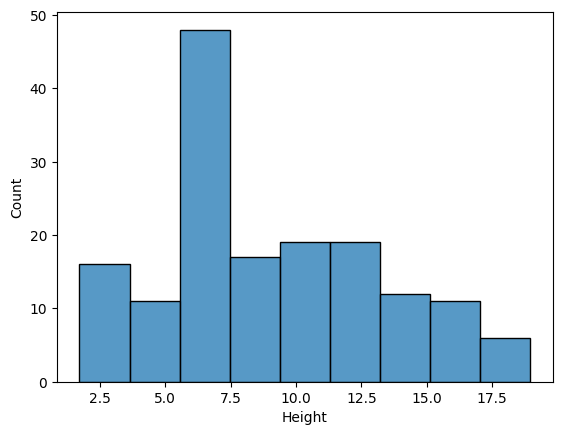

In [298]:
sns.histplot(df['Height'])

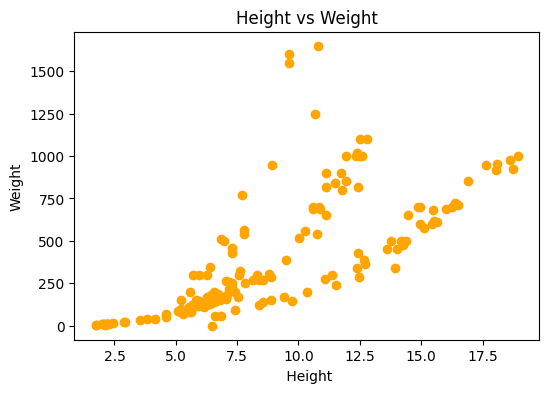

In [299]:
plt.figure(figsize=(6,4))
plt.scatter(df['Height'], df['Weight'], color='orange')
plt.xlabel(" Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show()

## width

<Axes: xlabel='Width', ylabel='Count'>

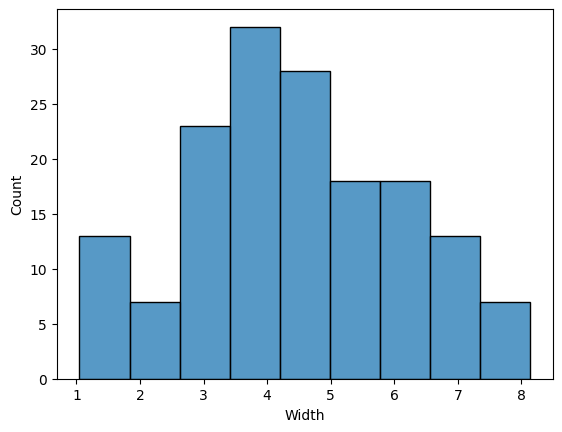

In [300]:
sns.histplot(df['Width'])

width vs weight

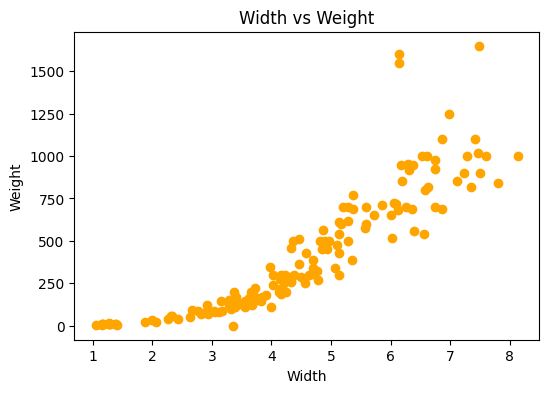

In [301]:
plt.figure(figsize=(6,4))
plt.scatter(df['Width'], df['Weight'], color='orange')
plt.xlabel("Width")
plt.ylabel("Weight")
plt.title("Width vs Weight")
plt.show()

# feature engineering

In [302]:
df['Avg_Length'] = df[['Length1','Length2','Length3']].mean(axis=1)


<Axes: xlabel='Avg_Length', ylabel='Count'>

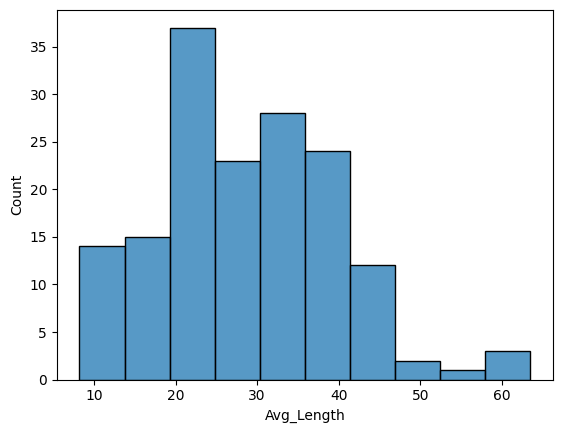

In [303]:
sns.histplot(df['Avg_Length'])

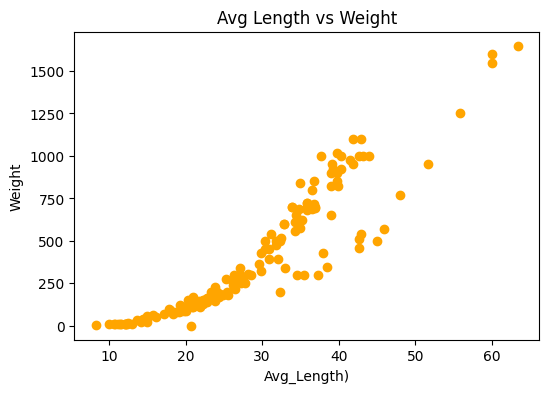

In [304]:
plt.figure(figsize=(6,4))
plt.scatter(df['Avg_Length'], df['Weight'], color='orange')
plt.xlabel("Avg_Length)")
plt.ylabel("Weight")
plt.title("Avg Length vs Weight")
plt.show()

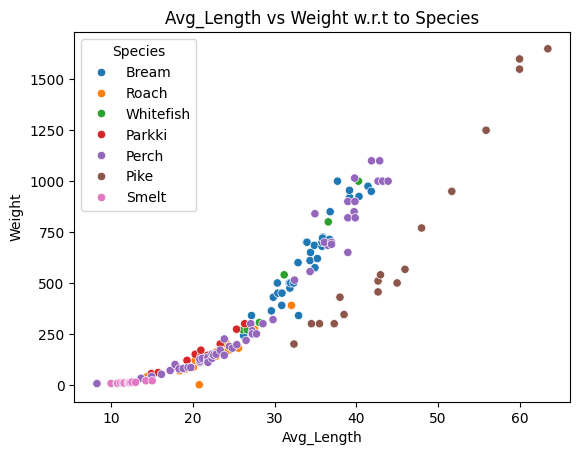

In [305]:
sns.scatterplot(data=df, x='Avg_Length', y='Weight', hue='Species')
plt.title('Avg_Length vs Weight w.r.t to Species')
plt.show()

In [306]:
df.corr(numeric_only=True)

,Weight,Length1,Length2,Length3,Height,Width,Avg_Length
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.920817
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.998614
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.999370
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.997214
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.659481
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,0.874757
Avg_Length,0.920817,0.998614,0.999370,0.997214,0.659481,0.874757,1.000000


<Axes: >

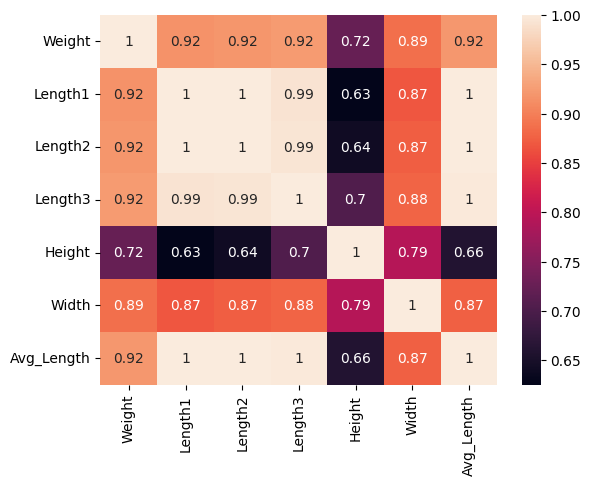

In [307]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

feature encoding

In [308]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid dummy trap
species_encoded = encoder.fit_transform(df[['Species']])
species_cols = encoder.get_feature_names_out(['Species'])
df_encoded = pd.DataFrame(species_encoded, columns=species_cols)

In [309]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Avg_Length
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333


In [310]:
df_encoded.head()

,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
df = pd.concat([df, df_encoded], axis=1)


In [312]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Avg_Length,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,26.200000,0.0,0.0,0.0,0.0,0.0,0.0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,27.166667,0.0,0.0,0.0,0.0,0.0,0.0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,27.166667,0.0,0.0,0.0,0.0,0.0,0.0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,29.600000,0.0,0.0,0.0,0.0,0.0,0.0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,29.833333,0.0,0.0,0.0,0.0,0.0,0.0


In [313]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Avg_Length', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

feature and target

In [314]:
X=df.drop(['Weight','Length1','Length2','Length3', 'Species'],axis=1)
y=df['Weight']

train test split

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

apply standard scaler on numerical features

In [316]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['Avg_Length','Height','Width']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

# linear regression with Length_avg

In [317]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)



LinearRegression()

predict

In [318]:
y_pred_lr = lr.predict(X_test_scaled)

evaluate

In [319]:
from sklearn.metrics import mean_absolute_error, r2_score

In [320]:
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression MAE: 67.57045670927636
Linear Regression R²: 0.9437110188151718


In [321]:
pd.DataFrame({"Actual": y_test, "Predicted": y_pred_lr})

,Actual,Predicted
78,78.0,10.605607
155,13.4,15.229346
128,200.0,186.810243
55,270.0,317.101489
94,150.0,198.215955
29,1000.0,725.223678
147,7.0,-51.168793
51,180.0,274.379138
98,188.0,254.865541
141,1250.0,1122.955186


# VISUALIZE

# Actual vs Predicted


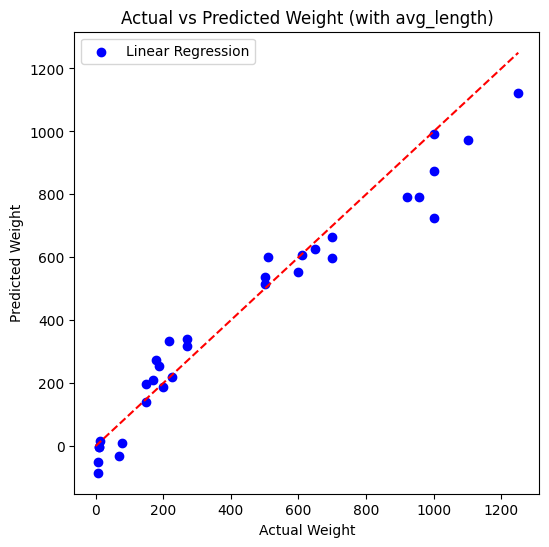

In [322]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.plot([0,max(y_test)],[0,max(y_test)], 'r--')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight (with avg_length)")
plt.legend()
plt.show()

apply PCA

In [323]:
df=pd.read_csv("/content/Fish[1].csv")

In [324]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


PCA applied on length

In [325]:
length_cols = ['Length1','Length2','Length3']
scaler_lengths = StandardScaler()
length_scaled = scaler_lengths.fit_transform(df[length_cols])

In [326]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
df['PCA_Length'] = pca.fit_transform(length_scaled)

In [327]:
print(df[['Length1','Length2','Length3','PCA_Length']])

     Length1  Length2  Length3  PCA_Length
0       23.2     25.4     30.0   -0.400897
1       24.0     26.3     31.2   -0.246061
2       23.9     26.5     31.1   -0.246017
3       26.3     29.0     33.5    0.147896
4       26.5     29.0     34.0    0.184394
..       ...      ...      ...         ...
154     11.5     12.2     13.4   -2.620087
155     11.7     12.4     13.5   -2.592693
156     12.1     13.0     13.8   -2.522103
157     13.2     14.3     15.2   -2.318275
158     13.8     15.0     16.2   -2.195813

[159 rows x 4 columns]


encode

In [328]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
species_encoded = encoder.fit_transform(df[['Species']])
species_cols = encoder.get_feature_names_out(['Species'])
df_encoded = pd.DataFrame(species_encoded, columns=species_cols)
df = pd.concat([df, df_encoded], axis=1)

In [329]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,PCA_Length,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,-0.400897,0.0,0.0,0.0,0.0,0.0,0.0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,-0.246061,0.0,0.0,0.0,0.0,0.0,0.0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,-0.246017,0.0,0.0,0.0,0.0,0.0,0.0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0.147896,0.0,0.0,0.0,0.0,0.0,0.0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0.184394,0.0,0.0,0.0,0.0,0.0,0.0


feature and target

In [330]:
X = df.drop(['Weight','Length1','Length2','Length3', 'Species'], axis=1)
y = df['Weight']

train test split

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


standard scaling

In [332]:
num_features = ['PCA_Length','Height','Width']
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

PCA Length vs weight

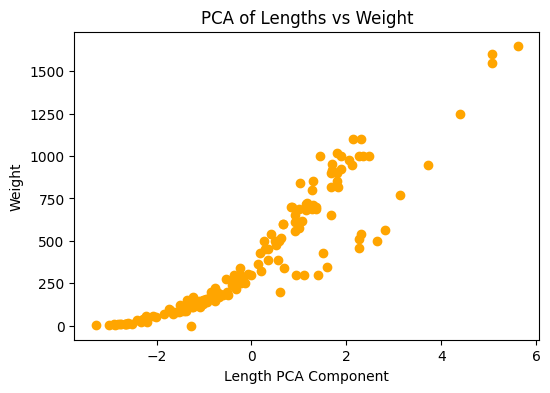

In [333]:
plt.figure(figsize=(6,4))
plt.scatter(df['PCA_Length'], df['Weight'], color='orange')
plt.xlabel("Length PCA Component")
plt.ylabel("Weight")
plt.title("PCA of Lengths vs Weight")
plt.show()

# Linear regression with PCA

In [334]:
PCA_lr = LinearRegression()
PCA_lr.fit(X_train_scaled, y_train)

LinearRegression()

predict

In [335]:
PCA_y_pred_lr = PCA_lr.predict(X_test_scaled)


evaluate

In [336]:
print("Linear Regression MAE:", mean_absolute_error(y_test,PCA_y_pred_lr))
print("Linear Regression R²:", r2_score(y_test,PCA_y_pred_lr))

Linear Regression MAE: 67.57143302343991
Linear Regression R²: 0.943625800886802


visualize actaual vs predicted

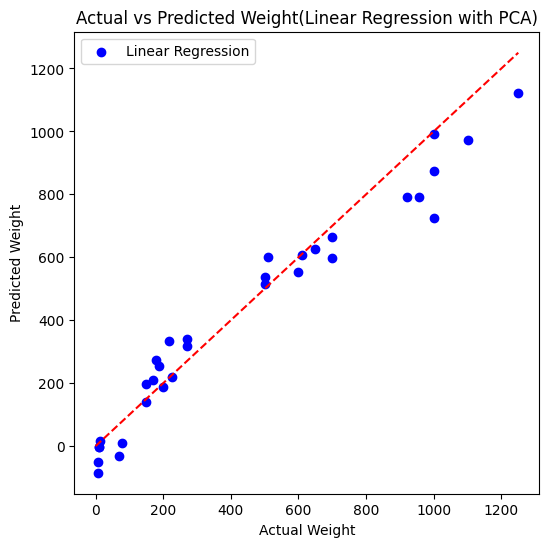

In [337]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,PCA_y_pred_lr, color='blue', label='Linear Regression')
plt.plot([0,max(y_test)],[0,max(y_test)], 'r--')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight(Linear Regression with PCA)")
plt.legend()
plt.show()

In [338]:
pd.DataFrame({"Actual": y_test, "Predicted": PCA_y_pred_lr})

,Actual,Predicted
78,78.0,10.811505
155,13.4,15.262053
128,200.0,187.047212
55,270.0,316.747551
94,150.0,197.839002
29,1000.0,724.931995
147,7.0,-51.024554
51,180.0,274.672612
98,188.0,254.709420
141,1250.0,1122.689378


comparision LinearRegression with  vs without PCA

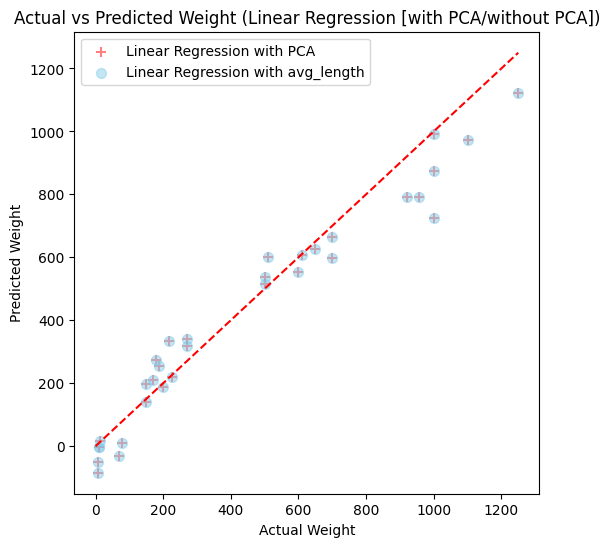

In [339]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, PCA_y_pred_lr, color='red',s=50, label='Linear Regression with PCA', marker='+', alpha=0.5)
plt.scatter(y_test, y_pred_lr, color='skyblue', s=50,label='Linear Regression with avg_length', marker='o', alpha=0.5)
plt.plot([0,max(y_test)],[0,max(y_test)], 'r--')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight (Linear Regression [with PCA/without PCA])")
plt.legend()
plt.show()

# **Polynomial  regression**

In [340]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [341]:
lin_reg_poly_y_pred = lin_reg_poly.predict(X_test_poly)

In [342]:
print("Polynomial Regression MAE:", mean_absolute_error(y_test, lin_reg_poly_y_pred))
print("Polynomial Regression R²:", r2_score(y_test, lin_reg_poly_y_pred))

Polynomial Regression MAE: 30.405265443034605
Polynomial Regression R²: 0.9864033486131143


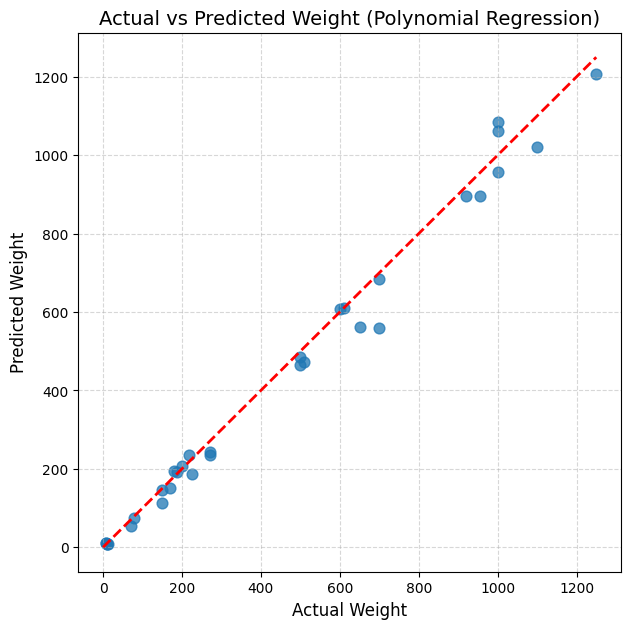

In [343]:
plt.figure(figsize=(7,7))

plt.scatter(
    y_test,
    lin_reg_poly_y_pred,
    alpha=0.75,
    s=60
)

# Perfect prediction line
max_val = max(max(y_test), max(lin_reg_poly_y_pred))
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2)

plt.xlabel("Actual Weight", fontsize=12)
plt.ylabel("Predicted Weight", fontsize=12)
plt.title("Actual vs Predicted Weight (Polynomial Regression)", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# since score is around 98 we should check for over fitting

If training performance is much better than testing performance, the model is overfitting.

In [344]:
train_mse = mean_squared_error(
    y_train, lin_reg_poly.predict(X_train_poly)
)

test_mse = mean_squared_error(
    y_test, lin_reg_poly.predict(poly_features.transform(X_test_scaled))
)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training MSE: 1351.4908166188281
Testing MSE: 1933.9779966274814


Since the testing MSE is higher than the training MSE, the model shows signs of overfitting. The difference is not large indicating only mild overfitting.

# Decision Tree

In [345]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [346]:
DT_y_pred=DT.predict(X_test_scaled)


In [347]:
print("Decision Tree MAE:",mean_absolute_error(y_test,DT_y_pred))
print("Decision Tree R²:", r2_score(y_test,DT_y_pred))


Decision Tree MAE: 67.775
Decision Tree R²: 0.9108178924601089


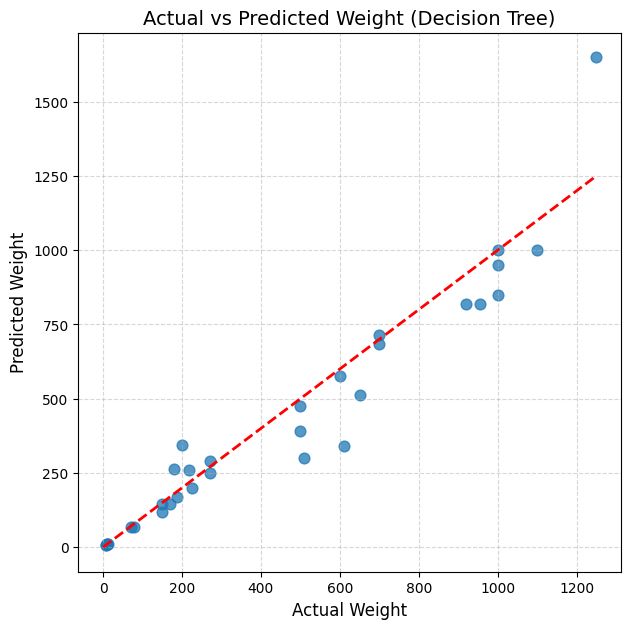

In [348]:
plt.figure(figsize=(7,7))

plt.scatter(
    y_test,
    DT_y_pred,
    alpha=0.75,
    s=60
)

# Perfect prediction line
max_val = max(max(y_test), max(lin_reg_poly_y_pred))
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2)

plt.xlabel("Actual Weight", fontsize=12)
plt.ylabel("Predicted Weight", fontsize=12)
plt.title("Actual vs Predicted Weight (Decision Tree)", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Random Forest

In [349]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [350]:
RF_y_pred=RF.predict(X_test_scaled)

In [351]:
print("Random forest MAE: ",mean_absolute_error(y_test,RF_y_pred))
print("Random forest R2: ",r2_score(y_test,RF_y_pred))

Random forest MAE:  53.803697916666664
Random forest R2:  0.9481664549052067


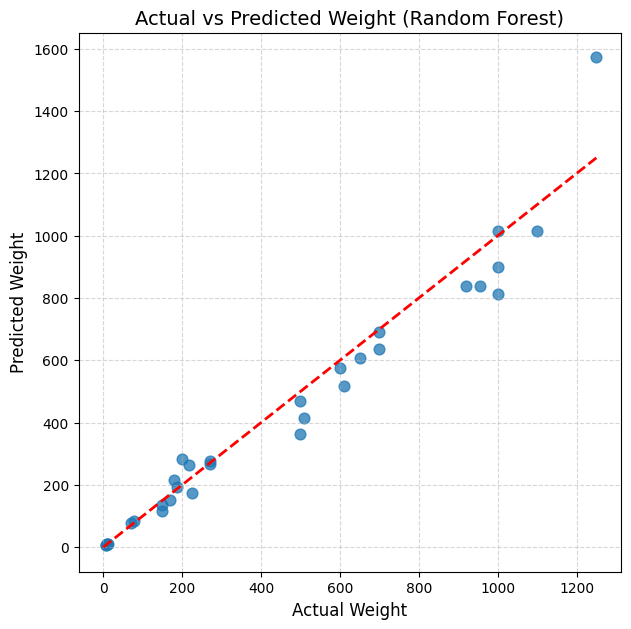

In [352]:
plt.figure(figsize=(7,7))

plt.scatter(
    y_test,
    RF_y_pred,
    alpha=0.75,
    s=60
)

# Perfect prediction line
max_val = max(max(y_test), max(lin_reg_poly_y_pred))
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2)

plt.xlabel("Actual Weight", fontsize=12)
plt.ylabel("Predicted Weight", fontsize=12)
plt.title("Actual vs Predicted Weight (Random Forest)", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# **XGBOOST**

In [353]:
from sklearn.ensemble import GradientBoostingRegressor
XGB=GradientBoostingRegressor()
XGB.fit(X_train_scaled,y_train)

GradientBoostingRegressor()

In [354]:
XGB_y_pred=XGB.predict(X_test_scaled)

In [355]:
print("XGBoost MAE: ",mean_absolute_error(y_test,XGB_y_pred))
print("XGBoost R2: ",r2_score(y_test,XGB_y_pred))

XGBoost MAE:  49.9559716771372
XGBoost R2:  0.9482556655048803


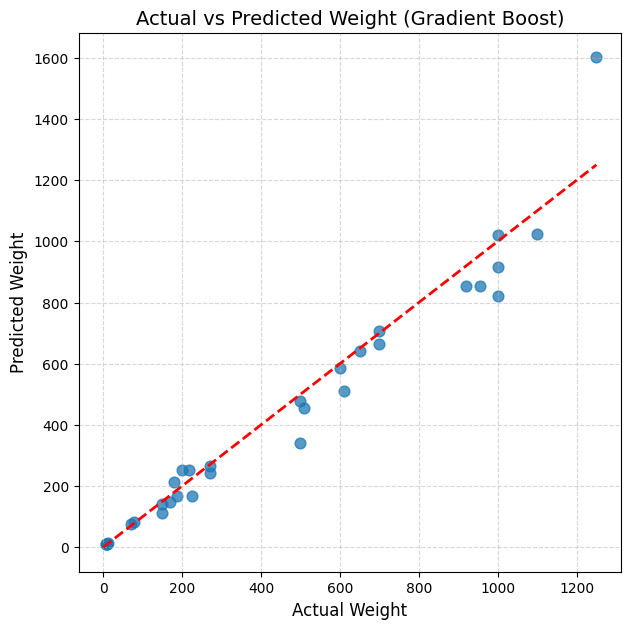

In [356]:
plt.figure(figsize=(7,7))

plt.scatter(
    y_test,
    XGB_y_pred,
    alpha=0.75,
    s=60
)

# Perfect prediction line
max_val = max(max(y_test), max(lin_reg_poly_y_pred))
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2)

plt.xlabel("Actual Weight", fontsize=12)
plt.ylabel("Predicted Weight", fontsize=12)
plt.title("Actual vs Predicted Weight (Gradient Boost)", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


SVM

In [357]:
from sklearn.svm import SVR
SVM=SVR()
SVM.fit(X_train_scaled,y_train)

SVR()

In [358]:
SVM_y_pred=SVM.predict(X_test_scaled)

In [359]:
print("SVM MAE: ",mean_absolute_error(y_test,SVM_y_pred))
print("SVM R2:",r2_score(y_test,SVM_y_pred))

SVM MAE:  302.04731369358024
SVM R2: -0.08856791969857447


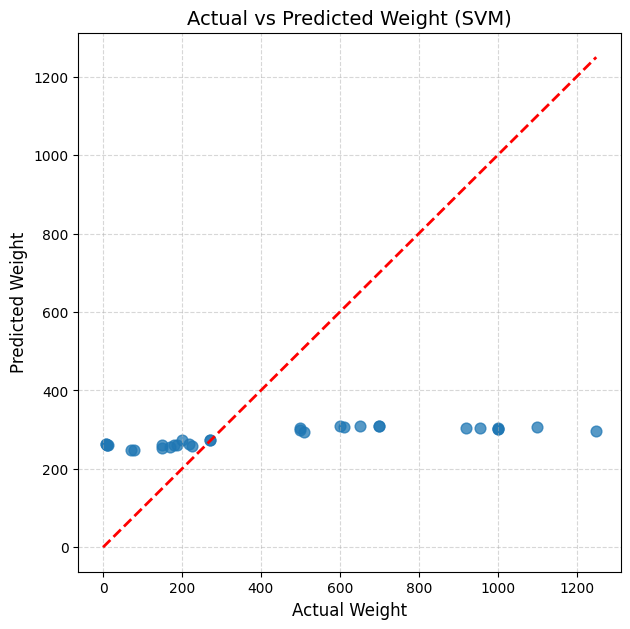

In [360]:
plt.figure(figsize=(7,7))

plt.scatter(
    y_test,
    SVM_y_pred,
    alpha=0.75,
    s=60
)

# Perfect prediction line
max_val = max(max(y_test), max(lin_reg_poly_y_pred))
plt.plot([0, max_val], [0, max_val], 'r--', linewidth=2)

plt.xlabel("Actual Weight", fontsize=12)
plt.ylabel("Predicted Weight", fontsize=12)
plt.title("Actual vs Predicted Weight (SVM)", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# **comparision**

In [361]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import pandas as pd

models = {
    "Linear": y_pred_lr,
    "Polynomial": lin_reg_poly_y_pred,
    "Decision Tree": DT_y_pred,
    "Random Forest": RF_y_pred,
    "XGBoost": XGB_y_pred,
    "SVR": SVM_y_pred
}

results = []

for name, preds in models.items():
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    })

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)

           Model         MAE        RMSE        R2
1     Polynomial   30.405265   43.977017  0.986403
4        XGBoost   49.955972   85.790893  0.948256
3  Random Forest   53.803698   85.864815  0.948166
0         Linear   67.570457   89.479073  0.943711
2  Decision Tree   67.775000  112.628590  0.910818
5            SVR  302.047314  393.493487 -0.088568


# Model Performance Analysis

### Best Model: Polynomial Regression

Lowest MAE: 30.40

Lowest RMSE: 43.98

Highest R²: 0.986

polynomial model Captures the non-linear relationship between fish size and weight extremely well.

Polynomial Regression was selected as the final model due to its highest R2 score and lowest error values.

# save best model

In [362]:
import pickle

with open('poly.pkl', 'wb') as file:
    pickle.dump(lin_reg_poly, file)

In [363]:
pickle.load(open('poly.pkl', 'rb'))

LinearRegression()